In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [42]:
business_df = pd.read_csv("data/csv/yelp_academic_dataset_business.csv")
business_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144072 entries, 0 to 144071
Data columns (total 16 columns):
neighborhood    57909 non-null object
business_id     144072 non-null object
hours           102464 non-null object
is_open         144072 non-null int64
address         139838 non-null object
attributes      127162 non-null object
categories      143747 non-null object
city            144071 non-null object
review_count    144072 non-null int64
name            144072 non-null object
longitude       144072 non-null float64
state           144072 non-null object
stars           144072 non-null float64
latitude        144072 non-null float64
postal_code     143336 non-null object
type            144072 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 18.7+ MB


In [51]:
business_df

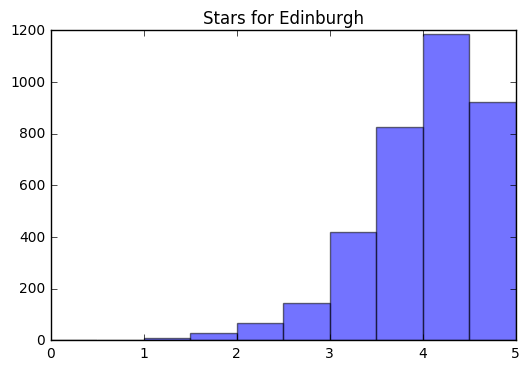

In [67]:
Edinburgh = business_df[business_df.city == 'Edinburgh']

n_total, bins, patch = plt.hist(Edinburgh.stars, range=(0,5),  alpha=0.55)
plt.title("Stars for Edinburgh")
plt.show()

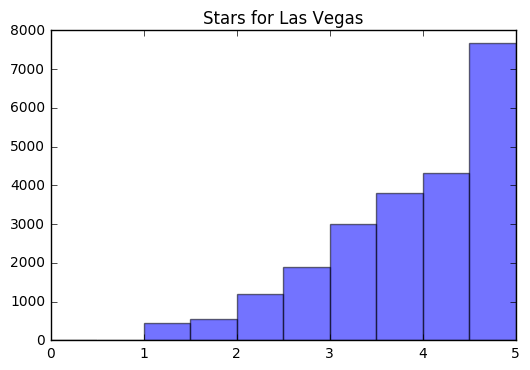

In [68]:
LV = business_df[business_df.city == 'Las Vegas']

n_total, bins, patch = plt.hist(LV.stars, range=(0,5),  alpha=0.55)
plt.title("Stars for Las Vegas")
plt.show()

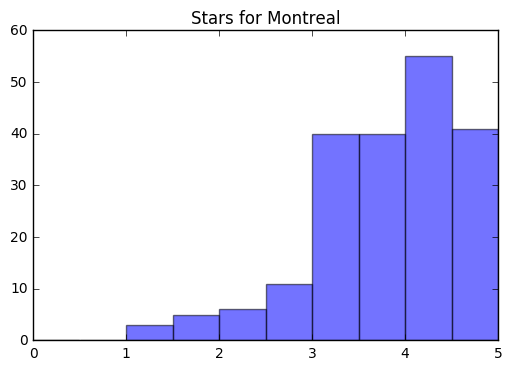

In [69]:
Montreal = business_df[business_df.city == 'Montreal']

n_total, bins, patch = plt.hist(Montreal.stars, range=(0,5),  alpha=0.55)
plt.title("Stars for Montreal")
plt.show()